In [1]:
#cv2
!pip install opencv-python-headless 
!pip install Pillow



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\nicoc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\nicoc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./src/segmentation/')
sys.path.append('./src/data_management/')
sys.path.append('./src/validation_modules/')

import image_processor  # Importa tu módulo
import telegrama_ballotage  # Importa tu módulo
import template_ballotage  # Importa tu módulo

import election_data_downloader

import telegram_validator

In [6]:

FOLDER = "./files-examples/"
FOLDER_TEMPLATE = "./files-templates/"
FILE_TELEGRAM_TEMPLATE = "AE-150-23-telegrama"
FILE_TELEGRAM = "mock_telegrama_99_aligned"


In [8]:
from PIL import Image

def rotate_image(input_path, output_path, degrees):
    # Abrir una imagen existente
    original_image = Image.open(input_path)
    
    # Rotar la imagen
    rotated_image = original_image.rotate(degrees, expand=True)  # expand=True para permitir que la imagen se expanda para acomodar las esquinas
    
    # Guardar la imagen rotada
    rotated_image.save(output_path)
    print(f"Imagen guardada como: {output_path}")

# Uso del script
rotate_image(f"{FOLDER}{FILE_TELEGRAM}.tiff", f"{FOLDER}{FILE_TELEGRAM}_move.tiff", 3) 

Imagen guardada como: ./files-examples/mock_telegrama_99_aligned_move.tiff


In [9]:
import numpy as np
from image_processor import ImageProcessor

# Uso de la clase
processor = ImageProcessor(f"{FOLDER_TEMPLATE}{FILE_TELEGRAM_TEMPLATE}.tiff", f"{FOLDER}{FILE_TELEGRAM}_move.tiff")

is_align = processor.read_and_align_images()


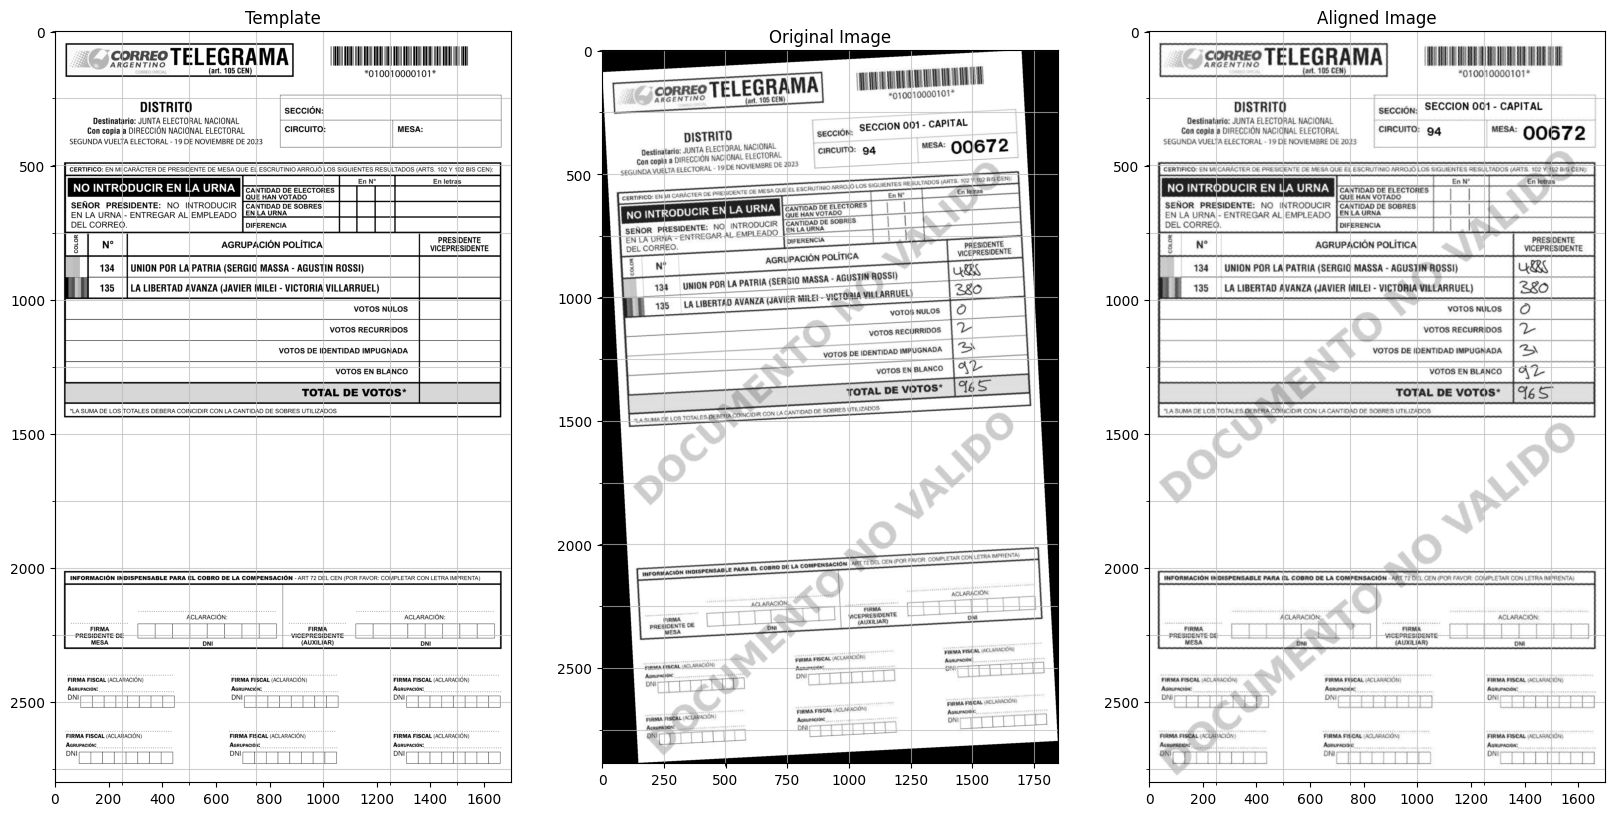

In [10]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Mostrar la imagen alineada
axes[0].imshow(processor.img_template, cmap='gray')
axes[0].set_title('Template')
axes[0].axis('on')

# Mostrar la imagen original
axes[1].imshow(processor.img, cmap='gray')
axes[1].set_title('Original Image')
axes[1].axis('on')

# Mostrar la imagen original
axes[2].imshow(processor.aligned_image, cmap='gray')
axes[2].set_title('Aligned Image')
axes[2].axis('on')

# Definir el espaciado de la cuadrícula
grid_color = '#bbbbbb'  # Un gris claro para la cuadrícula
grid_alpha = 0.7        # Transparencia de la cuadrícula
grid_spacing = 250      # Espaciado de la cuadrícula
grid_linewidth = 0.8    # Ancho de las líneas de la cuadrícula

# Dibujar la cuadrícula sobre la imagen alineada
axes[0].set_xticks(np.arange(-0.5, processor.img_template.shape[1], grid_spacing), minor=True)
axes[0].set_yticks(np.arange(-0.5, processor.img_template.shape[0], grid_spacing), minor=True)
axes[0].grid(which="minor", color=grid_color, linestyle='-', linewidth=grid_linewidth, alpha=grid_alpha)

# Dibujar la cuadrícula sobre la imagen original
axes[1].set_xticks(np.arange(-0.5, processor.img.shape[1], grid_spacing), minor=True)
axes[1].set_yticks(np.arange(-0.5, processor.img.shape[0], grid_spacing), minor=True)
axes[1].grid(which="minor", color=grid_color, linestyle='-', linewidth=grid_linewidth, alpha=grid_alpha)

# Dibujar la cuadrícula sobre la imagen original
axes[2].set_xticks(np.arange(-0.5, processor.aligned_image.shape[1], grid_spacing), minor=True)
axes[2].set_yticks(np.arange(-0.5, processor.aligned_image.shape[0], grid_spacing), minor=True)
axes[2].grid(which="minor", color=grid_color, linestyle='-', linewidth=grid_linewidth, alpha=grid_alpha)

# Mostrar las imágenes
plt.show()

In [11]:
from telegrama_ballotage import TelegramaBallotage
from template_ballotage import TemplateBallotage

aligned_binarizada = processor.binarize_aligned_image()
template_binarizada = processor.binarize_template_image()

# Crear instancias de Telegrama o Template con la imagen binarizada
telegrama = TelegramaBallotage(processor.aligned_image, aligned_binarizada)
template = TemplateBallotage(processor.img_template, template_binarizada)

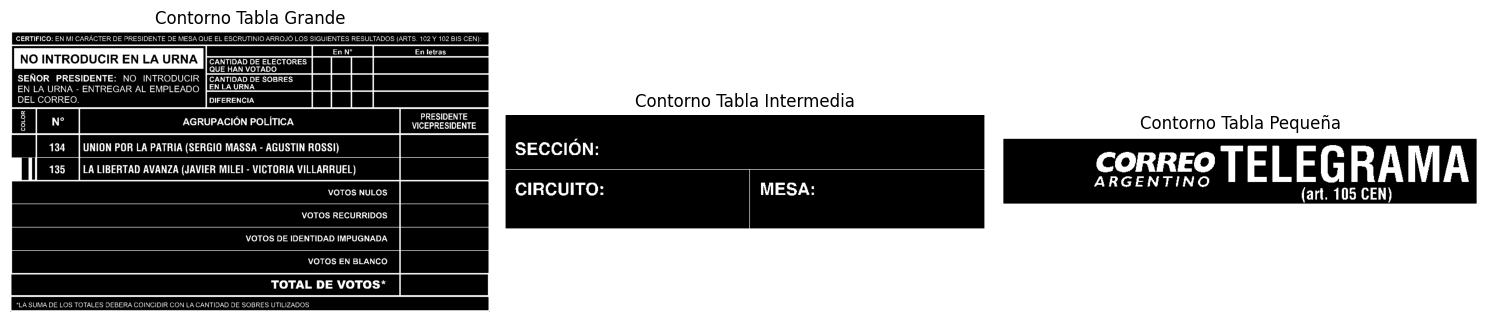

In [12]:
import cv2

# Configura una figura con 3 subplots (uno por cada recorte)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Subplot para la tabla grande
axes[0].imshow(template.tabla_grande.recorte, cmap='gray')
axes[0].set_title('Contorno Tabla Grande')
axes[0].axis('off')  # Desactiva los ejes

# Subplot para la tabla intermedia
axes[1].imshow(template.tabla_intermedia.recorte, cmap='gray')
axes[1].set_title('Contorno Tabla Intermedia')
axes[1].axis('off')  # Desactiva los ejes

# Subplot para la tabla pequeña
axes[2].imshow(template.tabla_pequena.recorte, cmap='gray')
axes[2].set_title('Contorno Tabla Pequeña')
axes[2].axis('off')  # Desactiva los ejes

# Ajustar el espacio entre los subplots para que no se superpongan los títulos
plt.tight_layout()
plt.show()

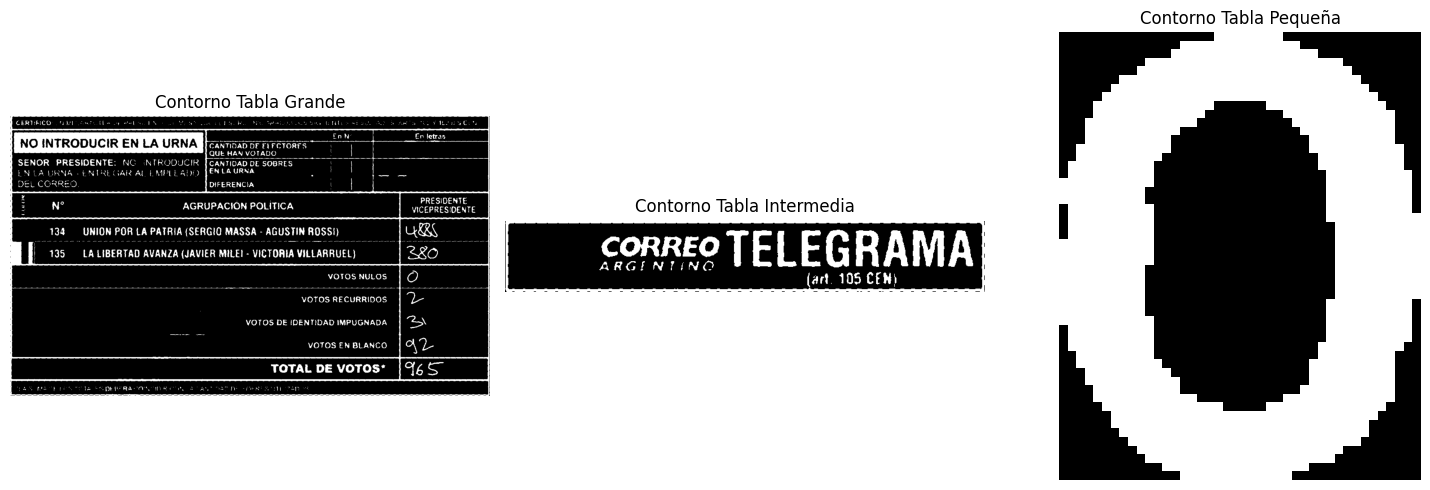

In [13]:
import cv2

# Configura una figura con 3 subplots (uno por cada recorte)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Subplot para la tabla grande
axes[0].imshow(telegrama.tabla_grande.recorte, cmap='gray')
axes[0].set_title('Contorno Tabla Grande')
axes[0].axis('off')  # Desactiva los ejes

# Subplot para la tabla intermedia
axes[1].imshow(telegrama.tabla_intermedia.recorte, cmap='gray')
axes[1].set_title('Contorno Tabla Intermedia')
axes[1].axis('off')  # Desactiva los ejes

# Subplot para la tabla pequeña
axes[2].imshow(telegrama.tabla_pequena.recorte, cmap='gray')
axes[2].set_title('Contorno Tabla Pequeña')
axes[2].axis('off')  # Desactiva los ejes

# Ajustar el espacio entre los subplots para que no se superpongan los títulos
plt.tight_layout()
plt.show()

Advertencia: se detectaron 14 filas, pero se esperaban 13.


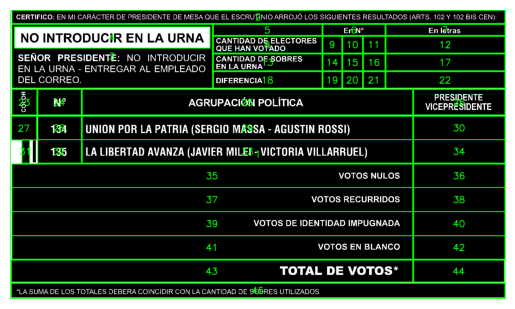

In [14]:
# Dibujar las celdas detectadas en 'tabla' y numerarlas después de ordenarlas
tabla_numerada = cv2.cvtColor(template.tabla_grande.recorte, cv2.COLOR_GRAY2BGR) 

# Procesa la tabla y recibe una lista de objetos Celda
celdas_procesadas = processor.process_table(template.tabla_grande.recorte, 1000, 3, 13)

# Dibuja los rectángulos y los números de ID en la imagen
for celda in celdas_procesadas:
    id_celda = celda.id
    x, y, w, h = celda.posicion
    
    # Dibujar un rectángulo alrededor de la celda
    cv2.rectangle(tabla_numerada, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Dibujar el número de ID de la celda
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(str(id_celda), font, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + (h + text_size[1]) // 2
    cv2.putText(tabla_numerada, str(id_celda), (text_x, text_y), font, 1, (0, 255, 0), 2)

# Mostrar la tabla con las celdas numeradas con IDs en orden
plt.imshow(cv2.cvtColor(tabla_numerada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Advertencia: se detectaron 7 filas, pero se esperaban 17.


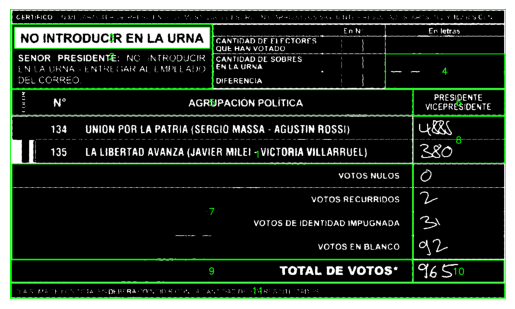

In [15]:
# Dibujar las celdas detectadas en 'tabla' y numerarlas después de ordenarlas
tabla_numerada = cv2.cvtColor(telegrama.tabla_grande.recorte, cv2.COLOR_GRAY2BGR) 

# Procesa la tabla y recibe una lista de objetos Celda
celdas_procesadas = processor.process_table(telegrama.tabla_grande.recorte)

# Dibuja los rectángulos y los números de ID en la imagen
for celda in celdas_procesadas:
    id_celda = celda.id
    x, y, w, h = celda.posicion
    
    # Dibujar un rectángulo alrededor de la celda
    cv2.rectangle(tabla_numerada, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Dibujar el número de ID de la celda
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(str(id_celda), font, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + (h + text_size[1]) // 2
    cv2.putText(tabla_numerada, str(id_celda), (text_x, text_y), font, 1, (0, 255, 0), 2)

# Mostrar la tabla con las celdas numeradas con IDs en orden
plt.imshow(cv2.cvtColor(tabla_numerada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Advertencia: se detectaron 14 filas, pero se esperaban 17.


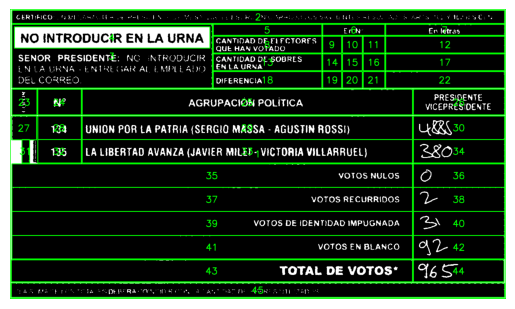

In [16]:
# Dibujar las celdas detectadas en 'tabla' y numerarlas después de ordenarlas
tabla_numerada = cv2.cvtColor(telegrama.tabla_grande.recorte, cv2.COLOR_GRAY2BGR) 

# Procesa la tabla y recibe una lista de objetos Celda
celdas_procesadas = processor.process_table(template.tabla_grande.recorte)

# Dibuja los rectángulos y los números de ID en la imagen
for celda in celdas_procesadas:
    id_celda = celda.id
    x, y, w, h = celda.posicion
    
    # Dibujar un rectángulo alrededor de la celda
    cv2.rectangle(tabla_numerada, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Dibujar el número de ID de la celda
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(str(id_celda), font, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y + (h + text_size[1]) // 2
    cv2.putText(tabla_numerada, str(id_celda), (text_x, text_y), font, 1, (0, 255, 0), 2)

# Mostrar la tabla con las celdas numeradas con IDs en orden
plt.imshow(cv2.cvtColor(tabla_numerada, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

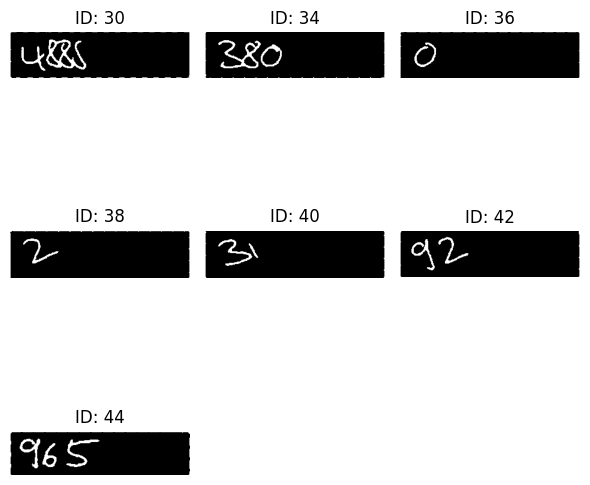

In [17]:
import math

# Lista de índices de las celdas que quieres extraer
indices_celdas_a_extraer = [30, 34, 36, 38, 40, 42, 44]

imagenes_celdas_extraidas = processor.extract_cells_by_id(celdas_procesadas, indices_celdas_a_extraer, telegrama.tabla_grande.recorte)

# Define cuántas columnas quieres por fila
num_columnas_por_fila = math.ceil(len(imagenes_celdas_extraidas) / 3)

# Establece el tamaño de la figura
ancho_figura = num_columnas_por_fila * 2  # Puedes ajustar el factor para que las imágenes sean más anchas si es necesario
alto_figura = 14 * 2  # Asumiendo que quieres 2 pulgadas de alto por imagen
plt.figure(figsize=(ancho_figura, alto_figura))

# Ahora, itera sobre tus imágenes y crea un subplot para cada una
for i, (indice, img) in enumerate(imagenes_celdas_extraidas):
    # Determina la fila y la columna basándote en el índice 'i'
    fila = i // num_columnas_por_fila
    columna = i % num_columnas_por_fila
    # Crea un subplot en la posición correcta
    plt.subplot(14, num_columnas_por_fila, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'ID: {indice}')
    plt.axis('off')

# Ajusta los subplots
plt.tight_layout()
plt.show()


# Recorte con combinacion de celdas.

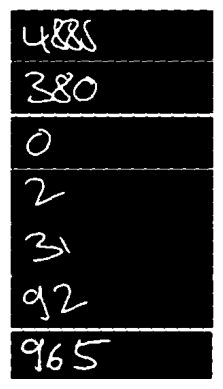

In [18]:
# Lista de índices de las celdas que quieres extraer
indices_celdas_a_extraer = [30, 34, 36, 38, 40, 42, 44]

imagenes_celdas_extraidas = processor.combine_cells_by_id(celdas_procesadas, indices_celdas_a_extraer, telegrama.tabla_grande.recorte)

plt.imshow(cv2.cvtColor(imagenes_celdas_extraidas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()